In [1]:
# import packages
import pylab
import imageio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# download video reader
imageio.plugins.ffmpeg.download()

In [3]:
# read video
filename = 'FILE0096.MP4'
vid = imageio.get_reader(filename,'ffmpeg')

In [4]:
# check imported image frames
big = 1
for i, im in enumerate(vid):
    print('Mean of frame %i is %1.1f' % (i, im.mean()))
    if im.max() > big:
        big = im.max()
    n_images = i

Mean of frame 0 is 0.0
Mean of frame 1 is 0.0
Mean of frame 2 is 0.0
Mean of frame 3 is 0.0
Mean of frame 4 is 0.0
Mean of frame 5 is 0.0
Mean of frame 6 is 0.0
Mean of frame 7 is 0.0
Mean of frame 8 is 0.0
Mean of frame 9 is 0.0
Mean of frame 10 is 0.0
Mean of frame 11 is 0.0
Mean of frame 12 is 0.0
Mean of frame 13 is 0.0
Mean of frame 14 is 0.0
Mean of frame 15 is 0.0
Mean of frame 16 is 0.0
Mean of frame 17 is 0.0
Mean of frame 18 is 0.0
Mean of frame 19 is 0.0
Mean of frame 20 is 0.0
Mean of frame 21 is 0.0
Mean of frame 22 is 0.0
Mean of frame 23 is 0.0
Mean of frame 24 is 0.0
Mean of frame 25 is 0.0
Mean of frame 26 is 0.0
Mean of frame 27 is 0.0
Mean of frame 28 is 0.0
Mean of frame 29 is 0.0
Mean of frame 30 is 0.0
Mean of frame 31 is 0.0
Mean of frame 32 is 0.0
Mean of frame 33 is 0.0
Mean of frame 34 is 0.0
Mean of frame 35 is 0.0
Mean of frame 36 is 0.0
Mean of frame 37 is 0.1
Mean of frame 38 is 0.2
Mean of frame 39 is 0.1
Mean of frame 40 is 0.0
Mean of frame 41 is 0.0
Me

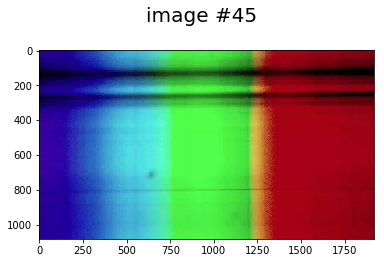

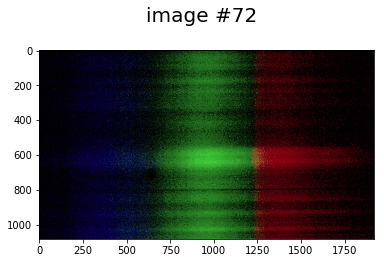

In [5]:
# plot sample image frames (spectrograms)
nums = [45,72]
for num in nums:
    image = vid.get_data(num)
    fig = pylab.figure()
    fig.suptitle('image #{}'.format(num),fontsize=20)
    pylab.imshow(image)
pylab.show()
slit_height = image.shape[0]

In [6]:
# initialize spatial image matrix
rgb_matrix = np.zeros((slit_height,n_images,3))

In [7]:
# define band that corresponds to red, green, and blue color
wl_red = 1350
wl_green = 900
wl_blue = 400

In [8]:
# fill spatial image matrix
for idx_fr in range(n_images):
    image = vid.get_data(idx_fr)
    for idx_ht in range(slit_height):
        rgb_matrix[idx_ht,idx_fr,0] = image[idx_ht,wl_red,0]
        rgb_matrix[idx_ht,idx_fr,1] = image[idx_ht,wl_green,1]
        rgb_matrix[idx_ht,idx_fr,2] = image[idx_ht,wl_blue,2]

In [15]:
# scale colors
rgb_matrix_tc = (rgb_matrix/big) #big

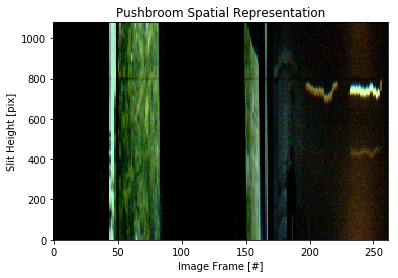

In [16]:
# plot spatial image of pushbroom scan (video)
plt.imshow(rgb_matrix_tc,interpolation='nearest',aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Image Frame [#]')
plt.ylabel('Slit Height [pix]')
plt.title('Pushbroom Spatial Representation');